# Practise Case EDA

### By Hendri Prabowo

Scenario:
Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals. 

This data set is wide ranging in the sense it encompasses stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each team was allotted from the TV rights deal. 
This data was gathered from 
1) BBC Sports Football 
2) Premierleague.com 
3) Transfermarkt.co.uk 

Some goals of this project: 
1.	Is this data clean? 
2.	How is the point distribution of the epl team? and which team is an anomaly?
3.	Which team has the best attack? 
4.	Which team has the best defence? 
5.	Which team is good in the financial aspect? 
6.	Explore your creativity!


## Import Data and Load Library

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

data=pd.read_csv('epl_1819.csv')
data.head(n=10)

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,...,122,128,355,581,2,785,370,6,53.3,82.3
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,...,100,148,501,720,2,824,464,4,47.4,78.2
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,...,94,85,456,700,4,825,430,5,51.0,77.3
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,...,90,96,436,676,4,945,500,5,50.8,79.2
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,...,148,141,457,723,5,855,397,5,49.0,78.7


## Number 1

In [17]:
# Missing value check
data.isnull().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

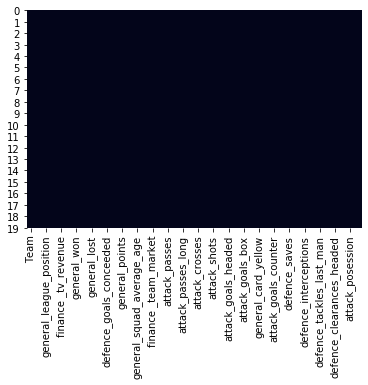

In [3]:
# Visualizing value check
sns.heatmap(data.isnull(), cbar=False)

In [4]:
# Check type data in each column
data.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                     object
attack_passes_through              int64
attack_passes_long                object
attack_passes_back                object
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

In [18]:
# Change data type for attack_passes, attack_passes_long, attack_passes_back, defence_clearances
data['attack_passes'] = data['attack_passes'].str.replace(',', '').astype(float)
data['attack_passes_long'] = data['attack_passes_long'].str.replace(',', '').astype(float)
data['attack_passes_back'] = data['attack_passes_back'].str.replace(',', '').astype(float)
data['defence_clearances'] = data['defence_clearances'].str.replace(',', '').astype(float)
data.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                    float64
attack_passes_through              int64
attack_passes_long               float64
attack_passes_back               float64
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

## Number 2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

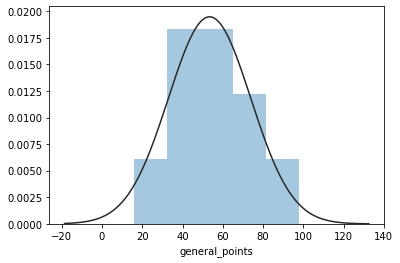

In [22]:
# Check data distribution
ax = sns.distplot(data['general_points'],fit=scipy.stats.norm, kde=False, hist=True)
ax.plot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


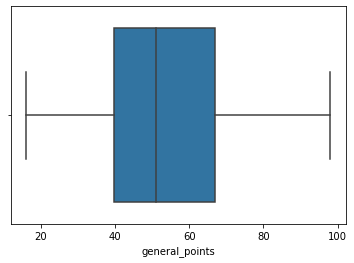

In [23]:
# Check anomaly in data
ax = sns.boxplot(data['general_points'])

## Number 3

In [110]:
# Select data for attack aspect
data_attack=data[['Team','category','general_league_position','attack_scored','attack_passes','attack_shots','attack_shots_on_target','attack_posession','attack_pass_accuracy']]
data_attack

,Team,category,general_league_position,attack_scored,attack_passes,attack_shots,attack_shots_on_target,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,95,26581.0,683,260,64.0,89.0
1,Liverpool,Champions League,2,89,23638.0,575,226,58.8,84.4
2,Chelsea,Champions League Qualification,3,63,25070.0,607,198,59.9,87.6
3,Tottenham,Champions League Qualification,4,67,21295.0,537,189,56.7,83.2
4,Arsenal,Europa League,5,73,20805.0,467,170,56.1,83.3
5,Manchester United,Europa League,6,65,19202.0,526,225,53.3,82.3
6,Wolverhampton,Europa League Qualification,7,47,16618.0,477,152,47.4,78.2
7,Everton,No UEFA Competitions,8,54,16494.0,498,169,51.0,77.3
8,Leicester,No UEFA Competitions,9,51,17219.0,515,184,50.8,79.2
9,West Ham,No UEFA Competitions,10,52,16358.0,441,157,49.0,78.7


In [111]:
# Scaliing attack aspect (0-1)
min_max_scaler = MinMaxScaler()
data_attack[list(data_attack)[3:]] = min_max_scaler.fit_transform(data_attack[list(data_attack)[3:]])
data_attack

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Team,category,general_league_position,attack_scored,attack_passes,attack_shots,attack_shots_on_target,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Liverpool,Champions League,2,0.917808,0.820055,0.665635,0.776316,0.791165,0.816733
2,Chelsea,Champions League Qualification,3,0.561644,0.907612,0.764706,0.592105,0.835341,0.944223
3,Tottenham,Champions League Qualification,4,0.616438,0.676796,0.547988,0.532895,0.706827,0.768924
4,Arsenal,Europa League,5,0.698630,0.646836,0.331269,0.407895,0.682731,0.772908
5,Manchester United,Europa League,6,0.589041,0.548823,0.513932,0.769737,0.570281,0.733068
6,Wolverhampton,Europa League Qualification,7,0.342466,0.390828,0.362229,0.289474,0.333333,0.569721
7,Everton,No UEFA Competitions,8,0.438356,0.383247,0.427245,0.401316,0.477912,0.533865
8,Leicester,No UEFA Competitions,9,0.397260,0.427576,0.479876,0.500000,0.469880,0.609562
9,West Ham,No UEFA Competitions,10,0.410959,0.374931,0.250774,0.322368,0.397590,0.589641


In [112]:
# Calculate avg_rating attack 
data_attack['Attack_Avg_Rating']=data_attack[list(data_attack)[3:]].mean(axis=1)
data_attack

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Team,category,general_league_position,attack_scored,attack_passes,attack_shots,attack_shots_on_target,attack_posession,attack_pass_accuracy,Attack_Avg_Rating
0,Manchester City,Champions League,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Liverpool,Champions League,2,0.917808,0.820055,0.665635,0.776316,0.791165,0.816733,0.797952
2,Chelsea,Champions League Qualification,3,0.561644,0.907612,0.764706,0.592105,0.835341,0.944223,0.767605
3,Tottenham,Champions League Qualification,4,0.616438,0.676796,0.547988,0.532895,0.706827,0.768924,0.641645
4,Arsenal,Europa League,5,0.698630,0.646836,0.331269,0.407895,0.682731,0.772908,0.590045
5,Manchester United,Europa League,6,0.589041,0.548823,0.513932,0.769737,0.570281,0.733068,0.620814
6,Wolverhampton,Europa League Qualification,7,0.342466,0.390828,0.362229,0.289474,0.333333,0.569721,0.381342
7,Everton,No UEFA Competitions,8,0.438356,0.383247,0.427245,0.401316,0.477912,0.533865,0.443657
8,Leicester,No UEFA Competitions,9,0.397260,0.427576,0.479876,0.500000,0.469880,0.609562,0.480692
9,West Ham,No UEFA Competitions,10,0.410959,0.374931,0.250774,0.322368,0.397590,0.589641,0.391044


In [113]:
# Sort the result
data_attack_sort=data_attack.sort_values(['Attack_Avg_Rating'],ascending=[False]).reset_index(drop=True)
data_attack_sort

,Team,category,general_league_position,attack_scored,attack_passes,attack_shots,attack_shots_on_target,attack_posession,attack_pass_accuracy,Attack_Avg_Rating
0,Manchester City,Champions League,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Liverpool,Champions League,2,0.917808,0.820055,0.665635,0.776316,0.791165,0.816733,0.797952
2,Chelsea,Champions League Qualification,3,0.561644,0.907612,0.764706,0.592105,0.835341,0.944223,0.767605
3,Tottenham,Champions League Qualification,4,0.616438,0.676796,0.547988,0.532895,0.706827,0.768924,0.641645
4,Manchester United,Europa League,6,0.589041,0.548823,0.513932,0.769737,0.570281,0.733068,0.620814
5,Arsenal,Europa League,5,0.698630,0.646836,0.331269,0.407895,0.682731,0.772908,0.590045
6,Leicester,No UEFA Competitions,9,0.397260,0.427576,0.479876,0.500000,0.469880,0.609562,0.480692
7,Everton,No UEFA Competitions,8,0.438356,0.383247,0.427245,0.401316,0.477912,0.533865,0.443657
8,Bournemouth,No UEFA Competitions,14,0.465753,0.349557,0.266254,0.361842,0.345382,0.565737,0.392421
9,West Ham,No UEFA Competitions,10,0.410959,0.374931,0.250774,0.322368,0.397590,0.589641,0.391044


In [114]:
# Top 5 team based on avg_rating attack
data_attack_sort[['Team','Attack_Avg_Rating']].head(n=5).reset_index(drop=True)

,Team,Attack_Avg_Rating
0,Manchester City,1.000000
1,Liverpool,0.797952
2,Chelsea,0.767605
3,Tottenham,0.641645
4,Manchester United,0.620814


## Number 4

In [115]:
# Select data for defend aspect
data_defend=data[['Team','category','general_league_position','defence_goals_conceeded']]
data_defend

,Team,category,general_league_position,defence_goals_conceeded
0,Manchester City,Champions League,1,23
1,Liverpool,Champions League,2,22
2,Chelsea,Champions League Qualification,3,39
3,Tottenham,Champions League Qualification,4,39
4,Arsenal,Europa League,5,51
5,Manchester United,Europa League,6,54
6,Wolverhampton,Europa League Qualification,7,46
7,Everton,No UEFA Competitions,8,46
8,Leicester,No UEFA Competitions,9,48
9,West Ham,No UEFA Competitions,10,55


In [116]:
# Scaliing defend aspect (0-1)
min_max_scaler = MinMaxScaler()
data_defend[list(data_defend)[3:]] = min_max_scaler.fit_transform(data_defend[list(data_defend)[3:]])
data_defend

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Team,category,general_league_position,defence_goals_conceeded
0,Manchester City,Champions League,1,0.016949
1,Liverpool,Champions League,2,0.000000
2,Chelsea,Champions League Qualification,3,0.288136
3,Tottenham,Champions League Qualification,4,0.288136
4,Arsenal,Europa League,5,0.491525
5,Manchester United,Europa League,6,0.542373
6,Wolverhampton,Europa League Qualification,7,0.406780
7,Everton,No UEFA Competitions,8,0.406780
8,Leicester,No UEFA Competitions,9,0.440678
9,West Ham,No UEFA Competitions,10,0.559322


In [117]:
# Calculate avg_rating defend 
data_defend['Defend_Avg_Rating']=1.000000-data_defend['defence_goals_conceeded']
data_defend

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Team,category,general_league_position,defence_goals_conceeded,Defend_Avg_Rating
0,Manchester City,Champions League,1,0.016949,9.830508e-01
1,Liverpool,Champions League,2,0.000000,1.000000e+00
2,Chelsea,Champions League Qualification,3,0.288136,7.118644e-01
3,Tottenham,Champions League Qualification,4,0.288136,7.118644e-01
4,Arsenal,Europa League,5,0.491525,5.084746e-01
5,Manchester United,Europa League,6,0.542373,4.576271e-01
6,Wolverhampton,Europa League Qualification,7,0.406780,5.932203e-01
7,Everton,No UEFA Competitions,8,0.406780,5.932203e-01
8,Leicester,No UEFA Competitions,9,0.440678,5.593220e-01
9,West Ham,No UEFA Competitions,10,0.559322,4.406780e-01


In [118]:
# Sort the result
data_defend[list(data_defend)[3:]] = min_max_scaler.fit_transform(data_defend[list(data_defend)[3:]])
data_defend_sort=data_defend.sort_values(['Defend_Avg_Rating'],ascending=[False]).reset_index(drop=True)
data_defend_sort

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Team,category,general_league_position,defence_goals_conceeded,Defend_Avg_Rating
0,Liverpool,Champions League,2,0.000000,1.000000
1,Manchester City,Champions League,1,0.016949,0.983051
2,Chelsea,Champions League Qualification,3,0.288136,0.711864
3,Tottenham,Champions League Qualification,4,0.288136,0.711864
4,Wolverhampton,Europa League Qualification,7,0.406780,0.593220
5,Everton,No UEFA Competitions,8,0.406780,0.593220
6,Newcastle,No UEFA Competitions,13,0.440678,0.559322
7,Leicester,No UEFA Competitions,9,0.440678,0.559322
8,Arsenal,Europa League,5,0.491525,0.508475
9,Crystal Palace,No UEFA Competitions,12,0.525424,0.474576


In [119]:
# Top 5 team based on avg_rating attack
data_defend_sort[['Team','Defend_Avg_Rating']].head(n=5).reset_index(drop=True)

,Team,Defend_Avg_Rating
0,Liverpool,1.000000
1,Manchester City,0.983051
2,Chelsea,0.711864
3,Tottenham,0.711864
4,Wolverhampton,0.593220


## Number 5

In [120]:
# Select data for finance aspect
data_finance=data[['Team','category','general_league_position','finance _tv_revenue','finance _team_market']]
data_finance

,Team,category,general_league_position,finance _tv_revenue,finance _team_market
0,Manchester City,Champions League,1,150986355,1003200000
1,Liverpool,Champions League,2,152425146,836440000
2,Chelsea,Champions League Qualification,3,146030216,779460000
3,Tottenham,Champions League Qualification,4,145230801,735240000
4,Arsenal,Europa League,5,142193180,701800000
5,Manchester United,Europa League,6,142512868,550440000
6,Wolverhampton,Europa League Qualification,7,127165114,369600000
7,Everton,No UEFA Competitions,8,128603905,305360000
8,Leicester,No UEFA Competitions,9,123328078,284240000
9,West Ham,No UEFA Competitions,10,122528663,234212000


In [121]:
# Scaliing finance aspect (0-1)
min_max_scaler = MinMaxScaler()
data_finance[list(data_finance)[3:]] = min_max_scaler.fit_transform(data_finance[list(data_finance)[3:]])
data_finance

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Team,category,general_league_position,finance _tv_revenue,finance _team_market
0,Manchester City,Champions League,1,0.974213,1.000000
1,Liverpool,Champions League,2,1.000000,0.818286
2,Chelsea,Champions League Qualification,3,0.885388,0.756197
3,Tottenham,Champions League Qualification,4,0.871060,0.708012
4,Arsenal,Europa League,5,0.816619,0.671573
5,Manchester United,Europa League,6,0.822349,0.506640
6,Wolverhampton,Europa League Qualification,7,0.547281,0.309584
7,Everton,No UEFA Competitions,8,0.573068,0.239584
8,Leicester,No UEFA Competitions,9,0.478512,0.216570
9,West Ham,No UEFA Competitions,10,0.464185,0.162056


In [122]:
# Calculate avg_rating finance 
data_finance['TV_Revenue_Rating']=data_finance['finance _tv_revenue']
data_finance['Expenses_For_Salary_Rating']=1.000000-data_finance['finance _team_market']
data_finance['Finance_Avg_Rating']=data_finance[list(data_finance)[5:]].mean(axis=1)
data_finance

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Team,category,general_league_position,finance _tv_revenue,finance _team_market,TV_Revenue_Rating,Expenses_For_Salary_Rating,Finance_Avg_Rating
0,Manchester City,Champions League,1,0.974213,1.000000,0.974213,1.110223e-16,0.487107
1,Liverpool,Champions League,2,1.000000,0.818286,1.000000,1.817136e-01,0.590857
2,Chelsea,Champions League Qualification,3,0.885388,0.756197,0.885388,2.438030e-01,0.564595
3,Tottenham,Champions League Qualification,4,0.871060,0.708012,0.871060,2.919883e-01,0.581524
4,Arsenal,Europa League,5,0.816619,0.671573,0.816619,3.284269e-01,0.572523
5,Manchester United,Europa League,6,0.822349,0.506640,0.822349,4.933595e-01,0.657854
6,Wolverhampton,Europa League Qualification,7,0.547281,0.309584,0.547281,6.904157e-01,0.618848
7,Everton,No UEFA Competitions,8,0.573068,0.239584,0.573068,7.604162e-01,0.666742
8,Leicester,No UEFA Competitions,9,0.478512,0.216570,0.478512,7.834300e-01,0.630971
9,West Ham,No UEFA Competitions,10,0.464185,0.162056,0.464185,8.379441e-01,0.651065


In [123]:
# Sort the result
data_finance=data_finance.sort_values(['Finance_Avg_Rating'],ascending=[False]).reset_index(drop=True)
data_finance

,Team,category,general_league_position,finance _tv_revenue,finance _team_market,TV_Revenue_Rating,Expenses_For_Salary_Rating,Finance_Avg_Rating
0,Everton,No UEFA Competitions,8,0.573068,0.239584,0.573068,7.604162e-01,0.666742
1,Manchester United,Europa League,6,0.822349,0.506640,0.822349,4.933595e-01,0.657854
2,West Ham,No UEFA Competitions,10,0.464185,0.162056,0.464185,8.379441e-01,0.651065
3,Newcastle,No UEFA Competitions,13,0.421203,0.140097,0.421203,8.599032e-01,0.640553
4,Leicester,No UEFA Competitions,9,0.478512,0.216570,0.478512,7.834300e-01,0.630971
5,Wolverhampton,Europa League Qualification,7,0.547281,0.309584,0.547281,6.904157e-01,0.618848
6,Liverpool,Champions League,2,1.000000,0.818286,1.000000,1.817136e-01,0.590857
7,Crystal Palace,No UEFA Competitions,12,0.315189,0.150405,0.315189,8.495949e-01,0.582392
8,Tottenham,Champions League Qualification,4,0.871060,0.708012,0.871060,2.919883e-01,0.581524
9,Watford,No UEFA Competitions,11,0.309459,0.156638,0.309459,8.433619e-01,0.576410


In [124]:
# Top 5 team based on avg_rating finance
data_finance[['Team','Finance_Avg_Rating']].head(n=5).reset_index(drop=True)

,Team,Finance_Avg_Rating
0,Everton,0.666742
1,Manchester United,0.657854
2,West Ham,0.651065
3,Newcastle,0.640553
4,Leicester,0.630971


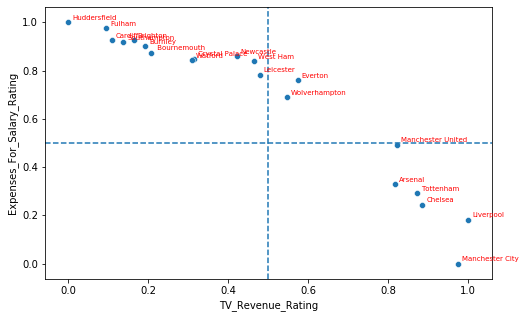

In [125]:
# Visualize finance aspect
plt.figure(figsize=(8,5))
ax=sns.scatterplot(data=data_finance, x="TV_Revenue_Rating", y="Expenses_For_Salary_Rating", palette="deep")
for i in range(data_finance.shape[0]):
 plt.text(x=data_finance.TV_Revenue_Rating[i]+0.01,y=data_finance.Expenses_For_Salary_Rating[i]+0.01,s=data_finance.Team[i], 
          fontdict=dict(color='red',size=7))
ax.axhline(0.5, ls='--')
ax.axvline(0.5, ls='--')

## Number 6

In [126]:
# Select data for visualize both attack and defence
data_at_def=data[['Team','category','general_league_position']]
data_at_def['Attack_Avg_Rating']=data_attack['Attack_Avg_Rating']
data_at_def['Defend_Avg_Rating']=data_defend['Defend_Avg_Rating']
data_at_def

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Team,category,general_league_position,Attack_Avg_Rating,Defend_Avg_Rating
0,Manchester City,Champions League,1,1.000000,0.983051
1,Liverpool,Champions League,2,0.797952,1.000000
2,Chelsea,Champions League Qualification,3,0.767605,0.711864
3,Tottenham,Champions League Qualification,4,0.641645,0.711864
4,Arsenal,Europa League,5,0.590045,0.508475
5,Manchester United,Europa League,6,0.620814,0.457627
6,Wolverhampton,Europa League Qualification,7,0.381342,0.593220
7,Everton,No UEFA Competitions,8,0.443657,0.593220
8,Leicester,No UEFA Competitions,9,0.480692,0.559322
9,West Ham,No UEFA Competitions,10,0.391044,0.440678


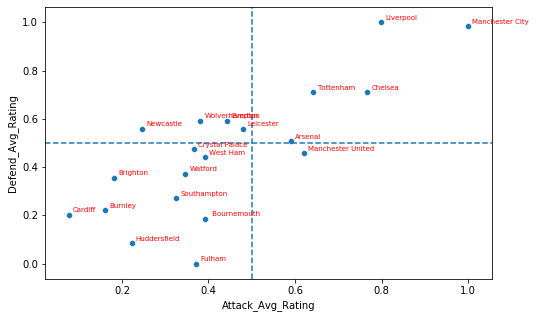

In [127]:
# Visualize both attack and finance aspect
plt.figure(figsize=(8,5))
ax=sns.scatterplot(data=data_at_def, x="Attack_Avg_Rating", y="Defend_Avg_Rating", palette="deep")
for i in range(data_at_def.shape[0]):
 plt.text(x=data_at_def.Attack_Avg_Rating[i]+0.01,y=data_at_def.Defend_Avg_Rating[i]+0.01,s=data_at_def.Team[i], 
          fontdict=dict(color='red',size=7))
ax.axhline(0.5, ls='--')
ax.axvline(0.5, ls='--')

In [130]:
# Select data for visualize ability of Manchester City
data_at_def_mcity=data_attack
data_at_def_mcity['defence_goals_conceeded']=data_defend['Defend_Avg_Rating']
data_at_def_mcity=data_at_def_mcity.drop(columns=['Attack_Avg_Rating'])
data_at_def_mcity

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Team,category,general_league_position,attack_scored,attack_passes,attack_shots,attack_shots_on_target,attack_posession,attack_pass_accuracy,defence_goals_conceeded
0,Manchester City,Champions League,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.983051
1,Liverpool,Champions League,2,0.917808,0.820055,0.665635,0.776316,0.791165,0.816733,1.000000
2,Chelsea,Champions League Qualification,3,0.561644,0.907612,0.764706,0.592105,0.835341,0.944223,0.711864
3,Tottenham,Champions League Qualification,4,0.616438,0.676796,0.547988,0.532895,0.706827,0.768924,0.711864
4,Arsenal,Europa League,5,0.698630,0.646836,0.331269,0.407895,0.682731,0.772908,0.508475
5,Manchester United,Europa League,6,0.589041,0.548823,0.513932,0.769737,0.570281,0.733068,0.457627
6,Wolverhampton,Europa League Qualification,7,0.342466,0.390828,0.362229,0.289474,0.333333,0.569721,0.593220
7,Everton,No UEFA Competitions,8,0.438356,0.383247,0.427245,0.401316,0.477912,0.533865,0.593220
8,Leicester,No UEFA Competitions,9,0.397260,0.427576,0.479876,0.500000,0.469880,0.609562,0.559322
9,West Ham,No UEFA Competitions,10,0.410959,0.374931,0.250774,0.322368,0.397590,0.589641,0.440678


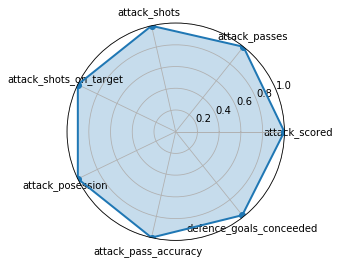

In [143]:
# Radar plot performance Manchester City
labels=np.array(data_at_def_mcity.columns.values[3:])
stats=data_at_def_mcity.loc[0,labels].values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)